In [1]:
#import the libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the selected road accidents dataset as pandas' dataframe 
df = pd.read_csv('./AddisAbaba_AccidentsDataset/RTA_Dataset.csv')

In [3]:
#return the first 5 rows of imported road accidents' dataframe
df.head(n=5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
#display a concise summary about the road accident dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
#display the total number of missing values (NaN) for each of the road accidents dataset's columns
#16 columns are identified to contain missing values with 'Defect_of_vehicle' column has the highest missing values at 4,427
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [6]:
#Display the distribution of the values within the target variable column of 'Accident_severity'
#Dataset is imbalanced with most observations (10,415 out of 12,316) predominant with values of 'Slight Injury' 
df['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

# Data Transformation 

## Convert 'Time' column's values into hour of day format

In [7]:
#Derived a new column of 'Hour_of_day' from existing 'Time' column 
df['DateTime'] = pd.to_datetime(df['Time'])
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,DateTime
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,2023-08-14 17:02:00
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,2023-08-14 17:02:00
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,2023-08-14 17:02:00
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,2023-08-14 01:06:00
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,2023-08-14 01:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,2023-08-14 16:15:00
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,2023-08-14 18:00:00
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,2023-08-14 13:55:00
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,2023-08-14 13:55:00


In [8]:
#extract only the hour of day information from the 'DateTime' column's values into new column of 'Hour_of_day'
#remove the columns of 'DateTime' and 'Time' from the road accidents dataset
df['Hour_of_day'] = df['DateTime'].dt.hour
df.drop(columns=['DateTime', 'Time'], axis=1, inplace=True)
df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


# Data Preprocessing

## Handling of Missing Values

In [9]:
#define a function specifically for handling the missing values in dataset 
def missing_values_handler(column, dataframe, threshold):
    #Replace the missing values with new categorical value of 'Unknown'
    dataframe[column].fillna('Unknown', inplace=True)
    
    #Standardize the category value for missing values ('Unknown') for every column to be the same
    dataframe[column].replace(['na', 'unknown'], 'Unknown', inplace=True)
    
    #boolean for indicating whether the column contains unknown values that needs to be validate for mode replacement
    mode_replacement_checking = False
    
    #store the number of missing values within the column if any
    if('Unknown' in dataframe[column].values):
        missing_value_count = dataframe[column].value_counts()['Unknown']
        mode_replacement_checking = True
        print(mode_replacement_checking)
    elif(column == 'Educational_level' or column == 'Casualty_severity'):
        mode_replacement_checking = True
    
    #replace the missing values with mode for calumns that have law missing values <= threshold or contain ordinal data
    if (mode_replacement_checking):
        if(column == 'Educational_level' or column == 'Casualty_severity' or missing_value_count <= threshold):
            dataframe[column].replace('Unknown', dataframe[column].mode()[0], inplace=True)

In [10]:
for column in df.columns:
    missing_values_handler(column, df, 500)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


C:\Users\Acer\AppData\Local\Temp\ipykernel_4332\2750047443.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if('Unknown' in dataframe[column].values):
C:\Users\Acer\AppData\Local\Temp\ipykernel_4332\2750047443.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if('Unknown' in dataframe[column].values):


In [11]:
#check if all missing values in dataset have been handled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Owner_of_vehicle             12316 non-null  object
 8   Service_year_of_vehicle      12316 non-null  object
 9   Defect_of_vehicle            12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

## Grouping less occured categorical values into single value 

In [12]:
#define a function used to group less occurs categorical values into single value
def categorical_values_shortening(column, df, threshold):
    value_counts = df[column].value_counts()
    categorical_mapping = {}
    for i  in range(len(value_counts)):
        if value_counts[i] >= threshold:
            categorical_mapping[value_counts.index[i]] = value_counts.index[i]
        else:
            categorical_mapping[value_counts.index[i]] = 'Other'
    mapped_column = df[column].map(categorical_mapping)
    df[column] = mapped_column

In [13]:
categorical_columns_for_values_shortening = ['Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 
                                              'Types_of_Junction', 'Weather_conditions', 'Type_of_collision',
                                              'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident',
                                              'Type_of_vehicle'
                                             ]

for column in categorical_columns_for_values_shortening:
    categorical_values_shortening(column, df, 200)
    #Standardize the categorical value of 'Other'
    df[column].replace('other', 'Other', inplace=True)

## Removing of trailing/leading white spaces around string values in dataset

In [14]:
#define a function used for removing leading whitespace in the string values within dataset
def trim_string_values(df):
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

In [15]:
df = trim_string_values(df)
#Standardize the categorical value of 'Normal'
df['Fitness_of_casuality'].replace('NormalNormal', 'Normal', inplace=True)

## Converting cleaned dataset into CSV file

In [16]:
# df.to_csv('cleaned_RTA_dataset.csv')

## Ordinal label encoding

In [17]:
from sklearn.preprocessing import OrdinalEncoder

#constructs the ordinal order for 'Educational_level' column
educational_level_order = ['Illiterate', 'Writing & reading', 'Elementary school', 'Junior high school',
                           'High school', 'Above high school'
                          ]
#ordinal encoding the 'Educational_level' column based on order defined above
oe_educational_level = OrdinalEncoder(categories=[educational_level_order])
df['Educational_level'] = oe_educational_level.fit_transform(df[['Educational_level']])

df['Educational_level'].value_counts()

3.0    8460
2.0    2163
4.0    1110
5.0     362
1.0     176
0.0      45
Name: Educational_level, dtype: int64

In [18]:
df.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Hour_of_day'],
      dtype='object')

In [19]:
#nominal category columns to be encoded
nominal_categorical_columns = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty','Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident',]

oe_nominal_categorical_columns = OrdinalEncoder()
#encoding the nominal categorical columns
encoded_nominal_categorical_columns_df = pd.DataFrame(oe_nominal_categorical_columns.fit_transform(df[nominal_categorical_columns]))
encoded_nominal_categorical_columns_df.columns = df[nominal_categorical_columns].columns
encoded_nominal_categorical_columns_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,6.0,...,0.0,2.0,1.0,3.0,2.0,5.0,6.0,4.0,1.0,5.0
1,1.0,1.0,1.0,0.0,3.0,8.0,3.0,2.0,2.0,2.0,...,0.0,4.0,1.0,3.0,2.0,5.0,6.0,4.0,1.0,10.0
2,1.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,2.0,5.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0
3,3.0,0.0,1.0,0.0,2.0,8.0,0.0,5.0,2.0,2.0,...,0.0,4.0,1.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0
4,3.0,0.0,1.0,0.0,1.0,11.0,3.0,2.0,2.0,1.0,...,0.0,4.0,1.0,3.0,2.0,5.0,6.0,4.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6.0,1.0,1.0,0.0,1.0,2.0,3.0,5.0,2.0,4.0,...,0.0,4.0,1.0,3.0,2.0,5.0,0.0,2.0,1.0,6.0
12312,3.0,4.0,1.0,0.0,2.0,0.0,3.0,5.0,2.0,4.0,...,0.0,4.0,3.0,3.0,2.0,5.0,0.0,2.0,1.0,6.0
12313,3.0,2.0,1.0,0.0,2.0,4.0,3.0,1.0,2.0,4.0,...,0.0,4.0,3.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0
12314,3.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,2.0,2.0,...,0.0,4.0,3.0,3.0,2.0,5.0,0.0,2.0,1.0,4.0


In [20]:
non_nominal_categorical_columns_df = df.drop(nominal_categorical_columns, axis=1)
non_nominal_categorical_columns_df.drop('Accident_severity', axis=1, inplace=True)
#combining the encoded columns of non nominal and nominal
encoded_df = pd.concat([non_nominal_categorical_columns_df, encoded_nominal_categorical_columns_df], axis=1)
encoded_df

,Educational_level,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,Hour_of_day,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,...,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
0,5.0,2,2,3,17,1.0,0.0,1.0,0.0,0.0,...,0.0,2.0,1.0,3.0,2.0,5.0,6.0,4.0,1.0,5.0
1,3.0,2,2,3,17,1.0,1.0,1.0,0.0,3.0,...,0.0,4.0,1.0,3.0,2.0,5.0,6.0,4.0,1.0,10.0
2,3.0,2,2,3,17,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0
3,3.0,2,2,3,1,3.0,0.0,1.0,0.0,2.0,...,0.0,4.0,1.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0
4,3.0,2,2,3,1,3.0,0.0,1.0,0.0,1.0,...,0.0,4.0,1.0,3.0,2.0,5.0,6.0,4.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,3.0,2,1,3,16,6.0,1.0,1.0,0.0,1.0,...,0.0,4.0,1.0,3.0,2.0,5.0,0.0,2.0,1.0,6.0
12312,2.0,2,1,3,18,3.0,4.0,1.0,0.0,2.0,...,0.0,4.0,3.0,3.0,2.0,5.0,0.0,2.0,1.0,6.0
12313,3.0,1,1,3,13,3.0,2.0,1.0,0.0,2.0,...,0.0,4.0,3.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0
12314,3.0,2,1,3,13,3.0,0.0,0.0,0.0,3.0,...,0.0,4.0,3.0,3.0,2.0,5.0,0.0,2.0,1.0,4.0


In [21]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Educational_level            12316 non-null  float64
 1   Number_of_vehicles_involved  12316 non-null  int64  
 2   Number_of_casualties         12316 non-null  int64  
 3   Casualty_severity            12316 non-null  object 
 4   Hour_of_day                  12316 non-null  int64  
 5   Day_of_week                  12316 non-null  float64
 6   Age_band_of_driver           12316 non-null  float64
 7   Sex_of_driver                12316 non-null  float64
 8   Vehicle_driver_relation      12316 non-null  float64
 9   Driving_experience           12316 non-null  float64
 10  Type_of_vehicle              12316 non-null  float64
 11  Owner_of_vehicle             12316 non-null  float64
 12  Service_year_of_vehicle      12316 non-null  float64
 13  Defect_of_vehicl

## Converting all input columns data type as float

In [22]:
encoded_df = encoded_df.astype(float)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Educational_level            12316 non-null  float64
 1   Number_of_vehicles_involved  12316 non-null  float64
 2   Number_of_casualties         12316 non-null  float64
 3   Casualty_severity            12316 non-null  float64
 4   Hour_of_day                  12316 non-null  float64
 5   Day_of_week                  12316 non-null  float64
 6   Age_band_of_driver           12316 non-null  float64
 7   Sex_of_driver                12316 non-null  float64
 8   Vehicle_driver_relation      12316 non-null  float64
 9   Driving_experience           12316 non-null  float64
 10  Type_of_vehicle              12316 non-null  float64
 11  Owner_of_vehicle             12316 non-null  float64
 12  Service_year_of_vehicle      12316 non-null  float64
 13  Defect_of_vehicl

## Label encoding the target column of 'Accident_severity'

In [23]:
from sklearn.preprocessing import LabelEncoder

#label encoding the target column of 'Accident_severity'
lb = LabelEncoder()
encoded_y = lb.fit_transform(df['Accident_severity'])
encoded_y = pd.DataFrame(encoded_y, columns=['Accident_severity'])
encoded_y
# 0:fatal injury, 1:serious injury, 2:slight injury

,Accident_severity
0,2
1,2
2,1
3,2
4,2
...,...
12311,2
12312,2
12313,1
12314,2


## Univariate features selection via Chi2 Statistical Test

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#carry out univariate feature selections based on statistical test of chi2
univariate_feature_selection = SelectKBest(score_func=chi2, k=10)
selected_features = univariate_feature_selection.fit_transform(encoded_df, encoded_y)
selected_features_names = univariate_feature_selection.get_feature_names_out()

In [25]:
#display the selected features via chi2 statistical test
selected_features_names

array(['Number_of_vehicles_involved', 'Number_of_casualties',
       'Hour_of_day', 'Age_band_of_driver', 'Type_of_vehicle',
       'Area_accident_occured', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Age_band_of_casualty'], dtype=object)

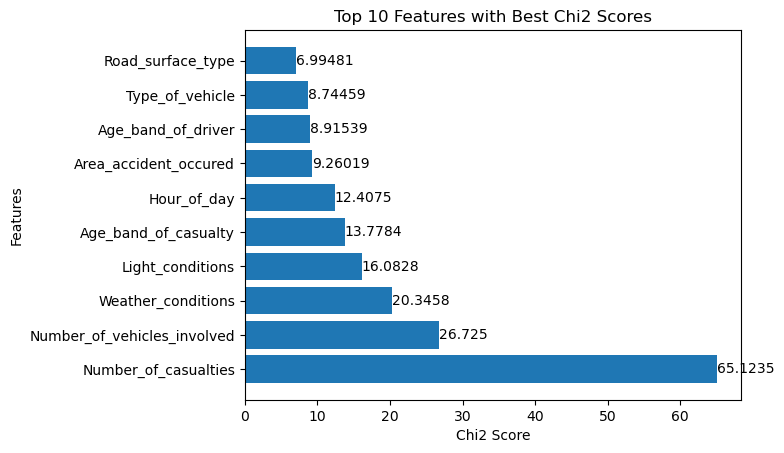

In [80]:
#display the chi2 scores
chi2_results = chi2(encoded_df, encoded_y)
chi2_scores = pd.Series(chi2_results[0], index=encoded_df.columns)
chi2_scores.sort_values(ascending=False, inplace=True)
chi2_scores.values[0:10]

#Plot the result in horizontal bar chart
fig, ax = plt.subplots()
ax.barh(chi2_scores.index[0:10], chi2_scores.values[0:10])
ax.set_title('Top 10 Features with Best Chi2 Scores')
ax.set_xlabel('Chi2 Score')
ax.set_ylabel('Features')

#Add on the chi2 score on the top of each column
for container in ax.containers:
        ax.bar_label(container)
        
plt.show()

In [26]:
univariate_selected_features_df = df[selected_features_names]
oe_2 = OrdinalEncoder()

univariate_selected_nominal_features = ['Age_band_of_driver', 'Type_of_vehicle', 'Area_accident_occured',
                                        'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Age_band_of_casualty'
                                       ]
univariate_selected_nominal_features_encoded_df = pd.DataFrame(oe_2.fit_transform(univariate_selected_features_df[univariate_selected_nominal_features]))
univariate_selected_nominal_features_encoded_df.columns = univariate_selected_features_df[univariate_selected_nominal_features].columns

univariate_selected_non_nominal_features_df = univariate_selected_features_df.drop(univariate_selected_nominal_features, axis=1)
univariate_selected_features_encoded_df = pd.concat([univariate_selected_non_nominal_features_df, univariate_selected_nominal_features_encoded_df], axis=1)
univariate_selected_features_encoded_df = univariate_selected_features_encoded_df.astype(float)
univariate_selected_features_encoded_df

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_day,Age_band_of_driver,Type_of_vehicle,Area_accident_occured,Road_surface_type,Light_conditions,Weather_conditions,Age_band_of_casualty
0,2.0,2.0,17.0,0.0,0.0,6.0,0.0,3.0,0.0,5.0
1,2.0,2.0,17.0,1.0,8.0,2.0,0.0,3.0,0.0,5.0
2,2.0,2.0,17.0,0.0,3.0,5.0,0.0,3.0,0.0,1.0
3,2.0,2.0,1.0,0.0,8.0,2.0,2.0,0.0,0.0,0.0
4,2.0,2.0,1.0,0.0,11.0,1.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...
12311,2.0,1.0,16.0,1.0,2.0,4.0,0.0,3.0,0.0,5.0
12312,2.0,1.0,18.0,4.0,0.0,4.0,0.0,3.0,0.0,5.0
12313,1.0,1.0,13.0,2.0,4.0,4.0,0.0,3.0,0.0,1.0
12314,2.0,1.0,13.0,0.0,3.0,2.0,0.0,0.0,0.0,5.0


## Oversampling of imbalanced dataset

In [27]:
from imblearn.over_sampling import SMOTENC

categorical_features_index = np.array(range(3, 10))

#Carry out oversampling via SMOTENC method
sm = SMOTENC(categorical_features=categorical_features_index, random_state=42)
x_res, y_res = sm.fit_resample(univariate_selected_features_encoded_df, encoded_y)

In [28]:
#value count for each values in target column of 'Accident_severity' should be equal
#0:fatal injury, 1:serious injury, 2:slight injury
y_res.value_counts()

Accident_severity
0                    10415
1                    10415
2                    10415
dtype: int64

# Predictive Models Building

## Dataset splitting into train and test datasets

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, random_state=42)

## Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

C:\Users\Acer\AppData\Local\Temp\ipykernel_4332\623959838.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Classification Report for Random Forest Model
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2599
           1       0.88      0.84      0.85      2639
           2       0.83      0.87      0.85      2574

    accuracy                           0.90      7812
   macro avg       0.90      0.90      0.90      7812
weighted avg       0.90      0.90      0.90      7812

Confusion Matrix for Random Forest Model


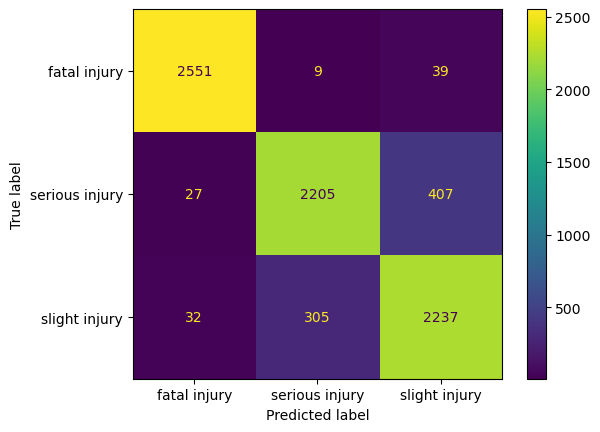

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['fatal injury', 'serious injury', 'slight injury'])
print('Classification Report for Random Forest Model')
print(classification_report(y_test, y_pred))
print('Confusion Matrix for Random Forest Model')
cm_display.plot()

## Decision Tree Model

Classification Report for Decision Tree Model
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2599
           1       0.78      0.84      0.81      2639
           2       0.82      0.75      0.78      2574

    accuracy                           0.85      7812
   macro avg       0.86      0.85      0.85      7812
weighted avg       0.85      0.85      0.85      7812

Confusion Matrix for Decision Tree Model


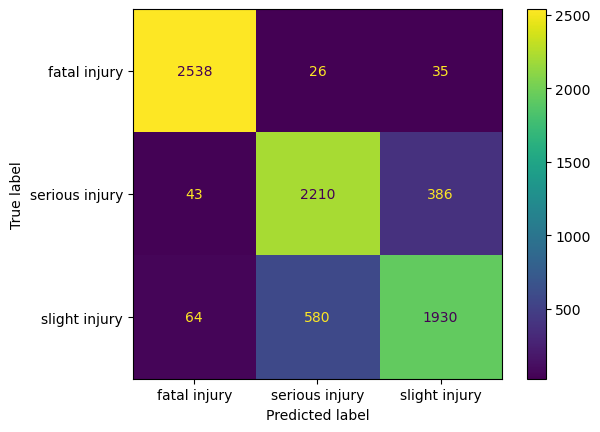

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

#confusion matrix plotting and classification report tabulation
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt.classes_)
cm_dt_display = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['fatal injury', 'serious injury', 'slight injury'])
print('Classification Report for Decision Tree Model')
print(classification_report(y_test, y_pred_dt))
print('Confusion Matrix for Decision Tree Model')
cm_dt_display.plot()

## Categorical Naive Bayes

Classification Report for Categorical Naive Bayes Model
              precision    recall  f1-score   support

           0       0.64      0.65      0.65      2599
           1       0.51      0.53      0.52      2639
           2       0.64      0.60      0.62      2574

    accuracy                           0.59      7812
   macro avg       0.60      0.60      0.60      7812
weighted avg       0.60      0.59      0.60      7812

Confusion Matrix for Categorical Naive Bayes Model


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


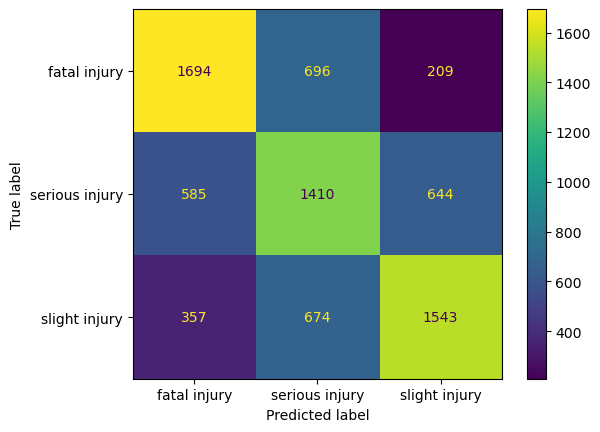

In [33]:
from sklearn.naive_bayes import CategoricalNB
nb = CategoricalNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

#confusion matrix plotting and classification report tabulation
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
cm_nb_display = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['fatal injury', 'serious injury', 'slight injury'])
print('Classification Report for Categorical Naive Bayes Model')
print(classification_report(y_test, y_pred_nb))
print('Confusion Matrix for Categorical Naive Bayes Model')
cm_nb_display.plot()

## K Nearest Neighbours

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification Report for K Nearest Neighbours Model
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2599
           1       0.75      0.86      0.80      2639
           2       0.83      0.66      0.73      2574

    accuracy                           0.83      7812
   macro avg       0.83      0.83      0.83      7812
weighted avg       0.83      0.83      0.83      7812

Confusion Matrix for K Nearest Neighbours Model


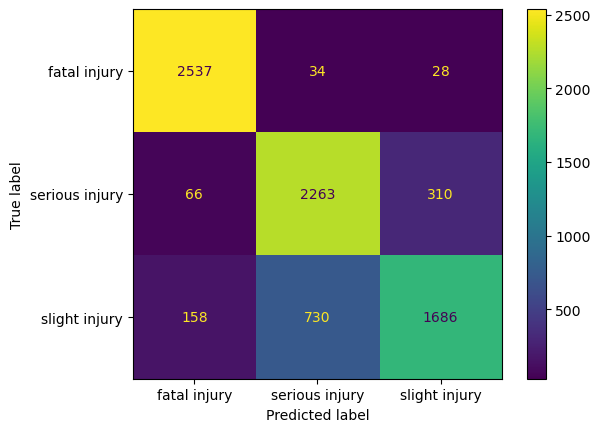

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=1, metric='manhattan')
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

#confusion matrix plotting and classification report tabulation
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
cm_knn_display = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['fatal injury', 'serious injury', 'slight injury'])
print('Classification Report for K Nearest Neighbours Model')
print(classification_report(y_test, y_pred_knn))
print('Confusion Matrix for K Nearest Neighbours Model')
cm_knn_display.plot()

## XGBoost Classifier

Classification Report for XGBoost Classifier Model
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2599
           1       0.81      0.83      0.82      2639
           2       0.83      0.80      0.81      2574

    accuracy                           0.87      7812
   macro avg       0.87      0.87      0.87      7812
weighted avg       0.87      0.87      0.87      7812

Confusion Matrix for XGBoost Classifier Model


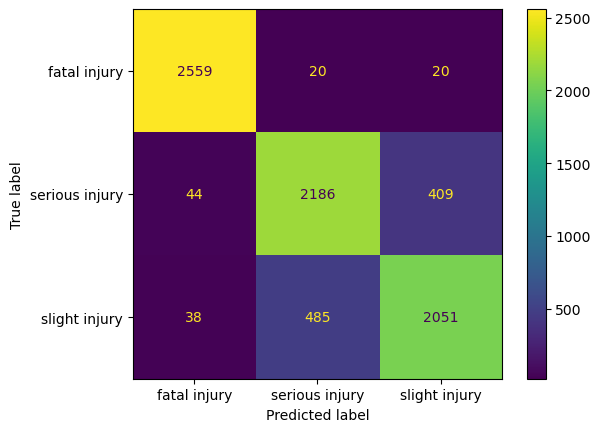

In [35]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)
y_pred_xgbc = xgbc.predict(x_test)

#confusion matrix plotting and classification report tabulation
cm_xgbc = confusion_matrix(y_test, y_pred_xgbc, labels=xgbc.classes_)
cm_xgbc_display = ConfusionMatrixDisplay(confusion_matrix=cm_xgbc, display_labels=['fatal injury', 'serious injury', 'slight injury'])
print('Classification Report for XGBoost Classifier Model')
print(classification_report(y_test, y_pred_xgbc))
print('Confusion Matrix for XGBoost Classifier Model')
cm_xgbc_display.plot()

In [36]:
x = pd.DataFrame([[2.0, 2.0, 17.0, '18-30', 'Lorry (41?100Q)', 'Recreational areas', 'Asphalt roads', 'Daylight', 'Normal', '31-50']], columns=selected_features_names)
x.iloc[:, 3:] = oe_2.transform(x.iloc[:, 3:])
x.astype(float)
x

C:\Users\Acer\AppData\Local\Temp\ipykernel_4332\4196773899.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 3:] = oe_2.transform(x.iloc[:, 3:])


,Number_of_vehicles_involved,Number_of_casualties,Hour_of_day,Age_band_of_driver,Type_of_vehicle,Area_accident_occured,Road_surface_type,Light_conditions,Weather_conditions,Age_band_of_casualty
0,2.0,2.0,17.0,0.0,3.0,5.0,0.0,3.0,0.0,1.0


In [37]:
predicted_y = rf.predict(x)
predicted_y

array([1])

## Hyperparamater Tuning with GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

#define a function to carry out grid search hyper parameters tuning
def grid_search_tuning(model, param_grid, x, y, nfolds):
    model_grid_search_cv = GridSearchCV(model, param_grid, cv=nfolds, n_jobs=-1)
    model_grid_search_cv.fit(x, y)
    return(model_grid_search_cv.best_params_)

### Decision Tree Model

In [39]:
# dt = DecisionTreeClassifier()
# dt_param = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None]}
# print(grid_search_tuning(dt, dt_param, x_train, y_train, 5))

Classification Report for Decision Tree Model
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2599
           1       0.80      0.84      0.82      2639
           2       0.82      0.77      0.79      2574

    accuracy                           0.86      7812
   macro avg       0.86      0.86      0.86      7812
weighted avg       0.86      0.86      0.86      7812

Confusion Matrix for Decision Tree Model


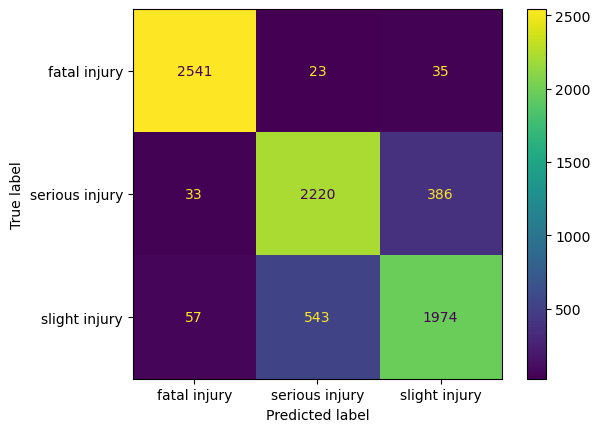

In [40]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

#confusion matrix plotting and classification report tabulation
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt.classes_)
cm_dt_display = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['fatal injury', 'serious injury', 'slight injury'])
print('Classification Report for Decision Tree Model')
print(classification_report(y_test, y_pred_dt))
print('Confusion Matrix for Decision Tree Model')
cm_dt_display.plot()

### K Nearest Neighbours

In [41]:
# knn = KNeighborsClassifier()
# knn_param = {'n_neighbors': np.arange(1, 31), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 
#              'minkowski'], 'leaf_size': range(1, 50, 5)
#             }
# print(grid_search_tuning(knn, knn_param, x_train, y_train, 5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification Report for K Nearest Neighbours Model
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2599
           1       0.76      0.84      0.80      2639
           2       0.81      0.70      0.75      2574

    accuracy                           0.84      7812
   macro avg       0.84      0.84      0.84      7812
weighted avg       0.84      0.84      0.84      7812

Confusion Matrix for K Nearest Neighbours Model


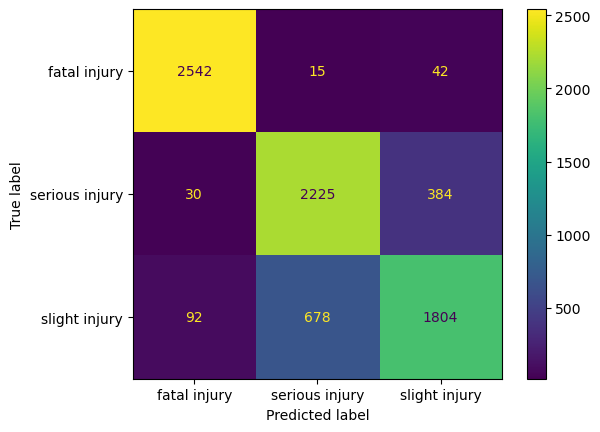

In [42]:
knn = KNeighborsClassifier(n_neighbors=1, p=1, metric='manhattan', weights='uniform', leaf_size=1)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

#confusion matrix plotting and classification report tabulation
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
cm_knn_display = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['fatal injury', 'serious injury', 'slight injury'])
print('Classification Report for K Nearest Neighbours Model')
print(classification_report(y_test, y_pred_knn))
print('Confusion Matrix for K Nearest Neighbours Model')
cm_knn_display.plot()

## Random Forest Classifier 

In [43]:
# rfc = RandomForestClassifier()
# rfc_param = {'n_estimators': [128, 200, 500], 'max_features': ['auto', 'sqrt', 'log2', None], 
#               'max_depth': [4,5,6,7,8, None], 'criterion': ['gini', 'entropy']}
# print(grid_search_tuning(rfc, rfc_param, x_train, y_train, 5))

C:\Users\Acer\AppData\Local\Temp\ipykernel_4332\905176454.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


Classification Report for Random Forest Classification Model
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2599
           1       0.88      0.84      0.86      2639
           2       0.84      0.87      0.85      2574

    accuracy                           0.90      7812
   macro avg       0.90      0.90      0.90      7812
weighted avg       0.90      0.90      0.90      7812

Confusion Matrix for Random Forest Classification Model


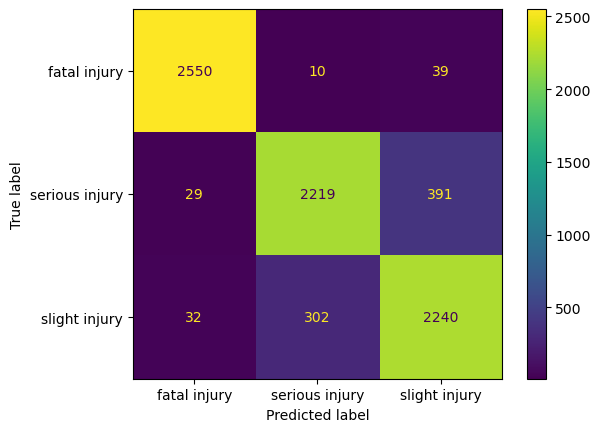

In [44]:
rfc = RandomForestClassifier(criterion='gini', max_depth=None, max_features='sqrt', n_estimators=500)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

#confusion matrix plotting and classification report tabulation
cm_rfc = confusion_matrix(y_test, y_pred_rfc, labels=rfc.classes_)
cm_rfc_display = ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=['fatal injury', 'serious injury', 'slight injury'])
print('Classification Report for Random Forest Classification Model')
print(classification_report(y_test, y_pred_rfc))
print('Confusion Matrix for Random Forest Classification Model')
cm_rfc_display.plot()

## XGBClassifier

In [45]:
# xgbc = XGBClassifier()
# xgbc_param = {'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1], 'max_depth': [1, 2, 3, 4, 5, 6],
#             'max_features': [1, 2, 3, 4, 5, 6], 'n_estimators': [20, 50, 80, 150, 300, 500]}
# print(grid_search_tuning(xgbc, xgbc_param, x_train, y_train, 5))

[12:33:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_features" } are not used.

Classification Report for XGBoost Classifier Model
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2599
           1       0.85      0.85      0.85      2639
           2       0.85      0.84      0.84      2574

    accuracy                           0.89      7812
   macro avg       0.89      0.89      0.89      7812
weighted avg       0.89      0.89      0.89      7812

Confusion Matrix for XGBoost Classifier Model


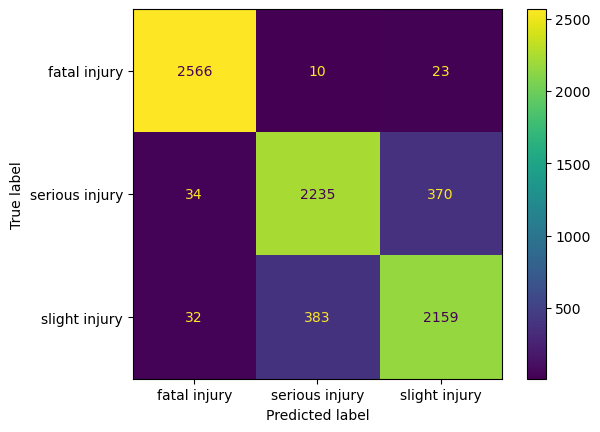

In [46]:
xgbc = XGBClassifier(learning_rate = 0.5, max_depth= 6, max_features = 1, n_estimators=500)
xgbc.fit(x_train, y_train)
y_pred_xgbc = xgbc.predict(x_test)

#confusion matrix plotting and classification report tabulation
cm_xgbc = confusion_matrix(y_test, y_pred_xgbc, labels=xgbc.classes_)
cm_xgbc_display = ConfusionMatrixDisplay(confusion_matrix=cm_xgbc, display_labels=['fatal injury', 'serious injury', 'slight injury'])
print('Classification Report for XGBoost Classifier Model')
print(classification_report(y_test, y_pred_xgbc))
print('Confusion Matrix for XGBoost Classifier Model')
cm_xgbc_display.plot()

# Pickle

In [47]:
import pickle

In [48]:
data = {'model': rfc, 'nominal_columns_encoder': oe_2}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)